In [5]:
%pylab inline
import numpy as np
from reconstruction import *
from scipy import ndimage
dat = np.loadtxt('../data/t2.txt')
x_obs_positions = sorted(set(dat[:, 0]))
y_obs_positions = sorted(set(dat[:, 1]))

Populating the interactive namespace from numpy and matplotlib


# Inverse problem

We wish to reconstruct surface ($z=0$) stresses $\sigma_{xz}(x,y)$, $\sigma_{yz}(x,y)$, from surface measurements $u_x$(x,y,z=0) where

$$u_x (\mathbf{r},z=0) = \int \left[G_{xy}(\mathbf{r}_\perp-\mathbf{r}_\perp^\prime , 0){\sigma_{yz}(\mathbf{r}_\perp^\prime)} +  G_{xx}(\mathbf{r}_\perp-\mathbf{r}_\perp^\prime , 0){\sigma_{xz}(\mathbf{r}_\perp^\prime)}\right] d\mathbf{r}_\perp. $$

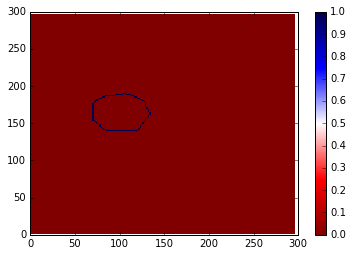

In [11]:
plt.pcolormesh(x_obs_positions,y_obs_positions,dat[:,3].reshape((190,190)).transpose(),
               cmap='seismic_r')
plt.colorbar()
plt.savefig('boundary.eps')

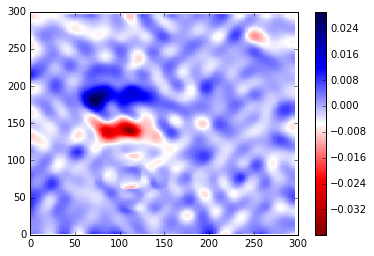

In [13]:
x_min = min(dat[dat[:,3]==1,0])
x_max = max(dat[dat[:,3]==1,0])
y_min = min(dat[dat[:,3]==1,1])
y_max = max(dat[dat[:,3]==1,1])

plt.pcolormesh(x_obs_positions,y_obs_positions,dat[:,2].reshape((190,190)).transpose(),
               cmap='seismic_r')
plt.colorbar()
plt.savefig('ux.eps')

In [3]:
dat.shape

(36100, 4)

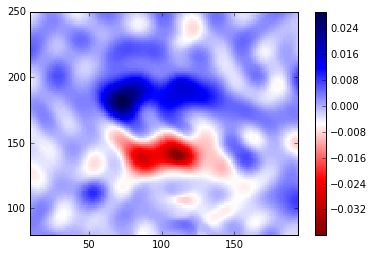

In [15]:
x_min = min(dat[dat[:,3]==1,0])
x_max = max(dat[dat[:,3]==1,0])
y_min = min(dat[dat[:,3]==1,1])
y_max = max(dat[dat[:,3]==1,1])

plt.xlim((x_min-60,x_max+60))
plt.ylim((y_min-60,y_max+60))
plt.pcolormesh(x_obs_positions,y_obs_positions,dat[:,2].reshape((190,190)).transpose(),
               cmap='seismic_r')
plt.colorbar()

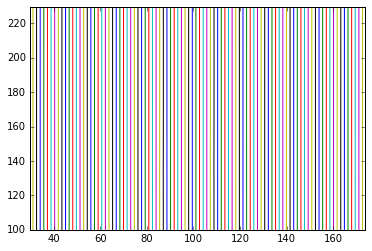

In [5]:
#plt.figure(figsize=(10,10))
#plt.xlim((50,150))
plt.xlim((x_min-40,x_max+40))
plt.ylim((y_min-40,y_max+40))
for j in range(190):
    plt.plot(dat[(j*190):((j+1)*190),0]+dat[(j*190):((j+1)*190),2], dat[(j*190):((j+1)*190),1])

In [6]:
boundary = dat[:,3].reshape((190,190))
mask = np.zeros(boundary.shape)
for r in range(boundary.shape[0]):
    pts = np.where(boundary[r,:]==1)
    if(len(pts[0])>0):
        mini  = (min(min(pts)))
        maxi = max(max(pts))
        mask[r,mini:maxi]=1

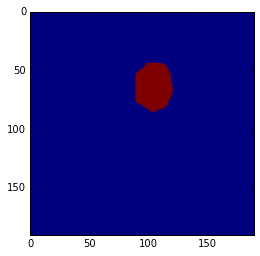

In [7]:
plt.imshow(mask)

In [8]:
distances = -ndimage.distance_transform_edt(mask)+ndimage.distance_transform_edt(1-mask)

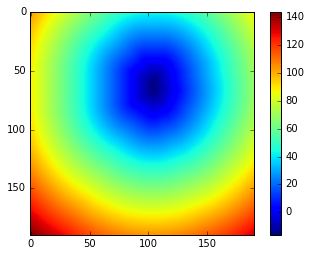

In [9]:
plt.imshow(distances)
plt.colorbar()

In [11]:
dat[:,0]

array([   1.555,    1.555,    1.555, ...,  295.45 ,  295.45 ,  295.45 ])